In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df['Region'].unique()
df['Segment'].unique()
df['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [10]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: ₹2,297,200.86
Total Profit: ₹286,397.02
Total Quantity Sold: 37873


In [11]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: ₹2,297,200.86
Total Profit: ₹286,397.02
Total Quantity Sold: 37873


/tmp/ipython-input-16-3293462839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')


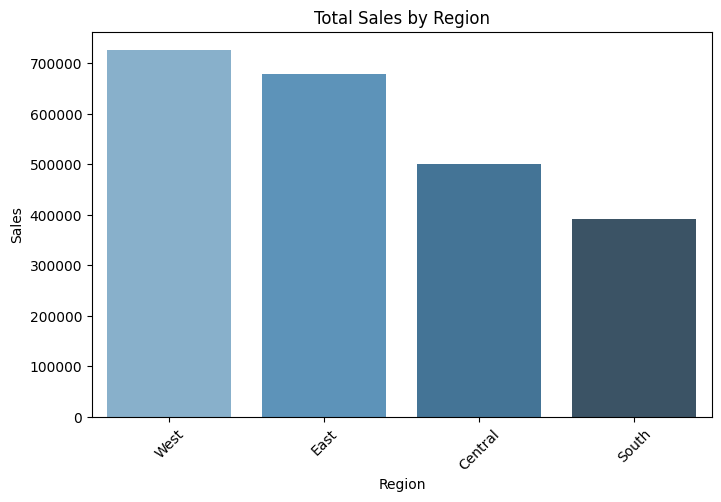

In [16]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-13-989902008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profit.index, y=segment_profit.values, palette='Greens_d')


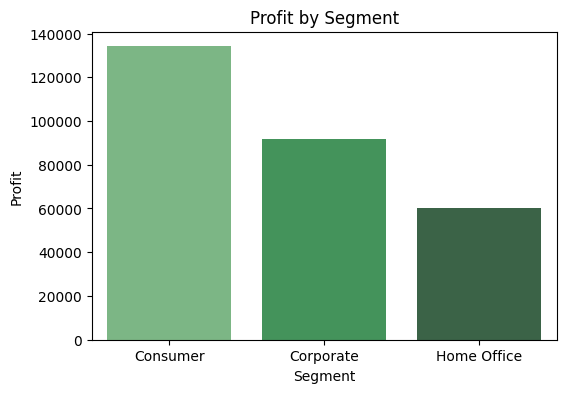

In [13]:
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=segment_profit.index, y=segment_profit.values, palette='Greens_d')
plt.title('Profit by Segment')
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()



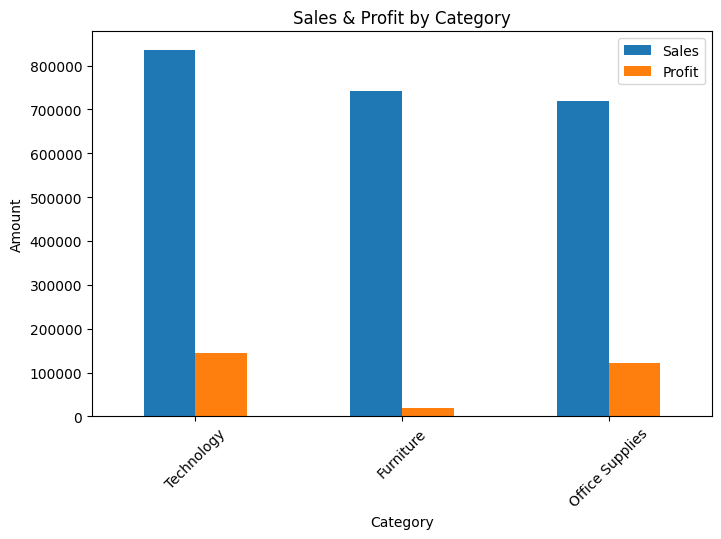

In [17]:
cat_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
cat_summary.plot(kind='bar', figsize=(8,5))
plt.title("Sales & Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()


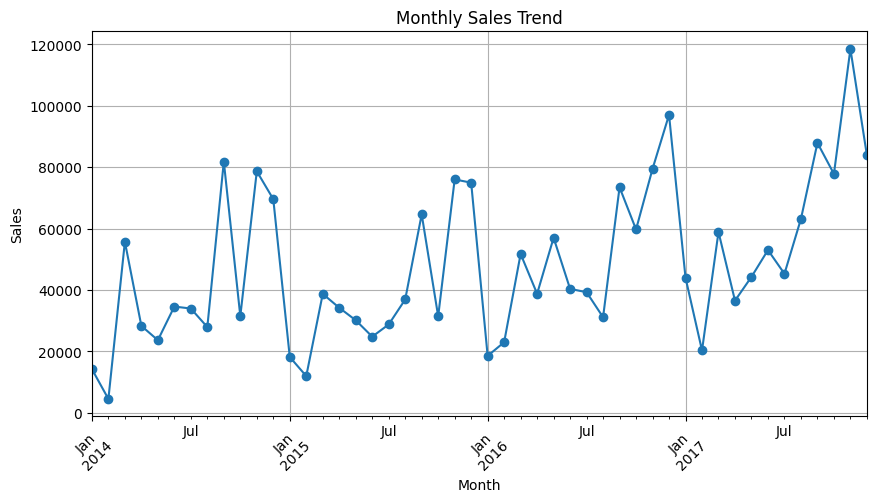

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid()
plt.show()
